# Suites

Les suites sont un très grand classique d'exemples de programmes en Python. Sujet en or permettant d'introduire facilement la notion d'itération et dans lequel le calcul par ordinateur peut remplacer un pénible calcul à la main, beaucoup d'algorithmes en cours de mathématiques au lycée en utilisent.

## Recherche d'un seuil

Algorithme de base, il est **extrêmement** utilisé, en cours comme au baccalauréat, le *connaitre*, le *comprendre* et savoir le *réécrire* même approximativement, d'autant plus qu'il est extrêment simple, est **vital**.

Ayant une suite $(u_n)_{n \in \mathbb{N}}$, recherchons le seuil de dépassement de $l \in \mathbb{R}$, c'est-à-dire le plus petit entier $m$ tels que $u_m \geq l$. L'idée est alors que calculer les termes de la suite jusqu'à ce que la limite soit dépassée.

In [1]:
def seuil(suite, limite):
    n = 0
    while suite(n) < limite:
        n += 1
    return n, suite(n)

Si la suite est définie par récurrence, le programme sera plutôt sous cette forme.

In [2]:
def seuil_recurrence(f, u0, limite):
    u = u0
    n = 0
    while u < limite:
        u = f(u)
        n += 1
    return n, u

Tous les programmes de recherche d'un seuil sont de cette forme, à quelques variations près. Par exemple, on peut vouloir que $u_m \leq l$.

**Attention**: Assurez-vous que la suite atteindra bel et bien ce seuil, **sinon la fonction bouclera indéfiniment**.

## Méthode de Héron

Un algorithme plus intéressant est celui de la [Méthode de Héron](https://fr.wikipedia.org/wiki/M%C3%A9thode_de_H%C3%A9ron), qui nous donne la première (enfin!) méthode pour calculer des racines carrés.

Afin de construire étape par étape un carré d'aire $a$, nous pouvons partir d'un rectangle de longueur $a$ et largeur $1$. Afin de diminuer l'écart entre largeur et longueur, on décide d'effectuer la moyenne de ces deux côtés, que la longueur ait cette valeur et la largeur, toujours, $\mathit{largeur} = \frac{a}{\mathit{longueur}}$. Et on répète ainsi le processus, la figure "s'approchant" de plus en plus d'un carré de longueur $\sqrt{a}$.

Ainsi, nous définissos la suite $(l_n)_{n\in \mathbb{N}}$ tels que
$$l_0 = a \text{ et pour tout } n \in \mathbb{N}, l_{n+1} = \frac{l_n + \frac{a}{l_n}}{2}$$

> Exercice: En analysant la fonction $f(x)=\frac{x+\frac{a}{x}}{2}$, montrer que $\lim_{n \to +\infty} l_n = \sqrt{a}$. Cet exercice est un très bon entrainement sur la récurrence, et sert en plus à quelque chose d'utile qui est de quand même avoir une manière de calculer des racines carrés.

In [3]:
def racine_carre(x, iterations=30):
    longueur, largeur = x, 1
    for _ in range(iterations):
        longueur = (longueur+largeur)/2
        largeur = x/longueur
    return longueur

Cet algorithme donne avec peu d'itérations de très bons résultats, comme on peut le voir ici: moins de 10 itérations donnent un bon résultat tout à fait viable !

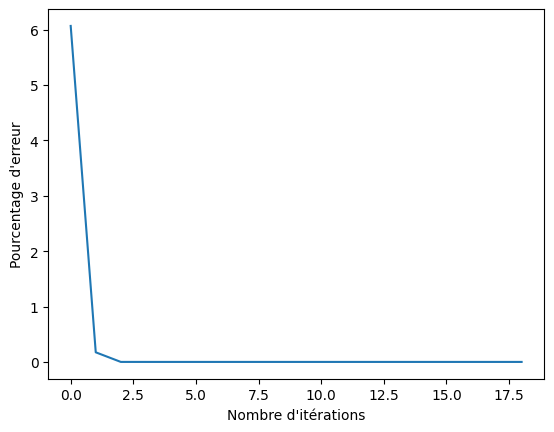

In [8]:
import matplotlib.pyplot as plt
from math import sqrt

x = list(range(1, 20))
plt.plot([abs(sqrt(2) - racine_carre(2, iterations=i))/sqrt(2) * 100 for i in x])
plt.xlabel("Nombre d'itérations")
plt.ylabel("Pourcentage d'erreur")
plt.show()

## Suite de Fibonacci

Une suite très connue et très appréciées des mathématiciens amateurs est la [suite de Fibonacci](https://fr.wikipedia.org/wiki/Suite_de_Fibonacci), introduite en Italie à la Renaissance par [Léonard de Pise](https://fr.wikipedia.org/wiki/Leonardo_Fibonacci) dans un problème de lapins.

La suite $(F_n)_{n \in \mathbb{N}}$ est définie ainsi:
$$u_0 = 0, u_1=1$$
$$u_{n+2} = u_{n+1} + u_n$$

Cette suite, définie assez simplement, possède de très nombreuses propriétés intéressantes, et est un exercice classique de programmation. L'idée est la suivante:
- Nous aurons deux variables `resultat` et `suivant`: `suivant` est le terme d'après.
- A chaque itération, `resultat` prend la valeur `suivant` et `suivant = suivant + resultat`
- On renvoie `resultat`: on aura calculé le terme d'après, mais pas grave...

In [5]:
def fibonacci(n):
    resultat, suivant = 0, 1
    for _ in range(n):
        resultat, suivant = suivant, resultat+suivant
    return resultat

def approx_phi(iterations=100):
    return fibonacci(iterations+1)/fibonacci(iterations)

On peut alors afficher les premiers termes de la suite:

In [10]:
print([fibonacci(i) for i in range(20)])

[0, 1, 1, 2, 3, 5, 8, 13, 21, 34, 55, 89, 144, 233, 377, 610, 987, 1597, 2584, 4181]


Une des propriétés qu'apprécie beaucoup les mathématiciens, mais aussi les artistes, c'est que le rapport entre deux termes successifs tend vers $\phi = \frac{1+\sqrt{5}}{2} \approx 1,618...$, le [nombre d'or](https://fr.wikipedia.org/wiki/Nombre_d%27or), étant (trop?) considéré par certains comme le rapport parfait entre les choses.

Sans le démontrer ici, nous pouvons le constater avec un graphique.

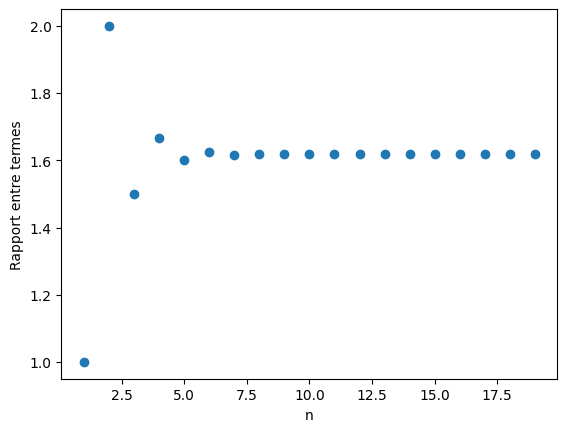

In [13]:
import matplotlib.pyplot as plt

def approx_phi(n):
    return fibonacci(n+1)/fibonacci(n)

x = list(range(1, 20))
y = [approx_phi(i) for i in x]
plt.scatter(x, y)
plt.xlabel("n")
plt.ylabel("Rapport entre termes")
plt.show()